# The Poisson Distribution

## Contents

1. When to use a Poisson Distribution?
2. Underlying Assumptions of the Poission Distribution
3. Derivation of the Poisson Distribution
4. Alternative Interpretation
5. Modelling the Number of Goals Scored in a Football Match

## When to use a Poisson Distribution?

The Poisson distribution is used in situations in which the underlying random variable can be thought of as the number of events occuring over a given period of time or space. Examples include:

1. The number of goals in a football match
2. The number of calls to a switch board in an hour
3. The number of flaws per metre squared in a given material

## Underlying Assumptions of the Poisson Distribution

For a random variable to follow a Poisson distribution the following must be true:

1. Events occur "singly". One after the other. (you can only score one goal in one moment of time in a football match)
2. Events are independent of each other
3. The mean number of events per interval is proportional to the length of the interval

## Derivation of the Poisson Distribution

A full derivation of the Poisson Distribution is given below (including mean and variance):

In [5]:
%%HTML
 <iframe src="Poisson Distribution.pdf" height=800 width=900></iframe> 

## Alternative Explanation

A nice informal explanation of the Poisson distribution starts with the Taylor expansion of e.

$$e^{\lambda t} = \frac{(\lambda t)^0}{0!} + \frac{(\lambda t)^1}{1!} + \frac{(\lambda t)^2}{2!} ....$$

Division gives:

$$1 = \frac{(\lambda t)^0}{0!}e^{-\lambda t} + \frac{(\lambda t)^1}{1!}e^{-\lambda t} + \frac{(\lambda t)^2}{2!}e^{-\lambda t} ....$$

We could form a distribution by considering the first term to be P(X=0) and the second P(X=1) etc, these terms are exactly those of the Poisson distribution and they sum to one, implying we have valid distribution!

## Modelling the Number of Goals in a Football Match

Seems like [this website](http://www.football-data.co.uk/englandm.php) is the place to go for football data.

### Downloading the Data:

In [1]:
!wget http://www.football-data.co.uk/mmz4281/1617/E0.csv

--2017-11-20 20:36:37--  http://www.football-data.co.uk/mmz4281/1617/E0.csv
Resolving www.football-data.co.uk (www.football-data.co.uk)... 217.160.223.109
Connecting to www.football-data.co.uk (www.football-data.co.uk)|217.160.223.109|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99990 (98K) [text/csv]
Saving to: ‘E0.csv.5’

E0.csv.5            100%[===================>]  97.65K  --.-KB/s    in 0.05s   

2017-11-20 20:36:37 (1.81 MB/s) - ‘E0.csv.5’ saved [99990/99990]



### Importing into Python:

In [2]:
import pandas as pd
df = pd.read_csv('E0.csv')
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


### Calculating Total Number of Goals and Creating a Histogram

In [3]:
# adding home goals to away goals to calculate the total

df['FTG'] = df['FTHG'] + df['FTAG']

# plotting a histogram to show the shape of the distribution

maxg = max(df['FTG'])

# finding how many time 0,1,   ,max goal where scored

goals_act = []

for i in range(0,maxg+1):
    goals_act.append(sum(df['FTG']==i))


### Calculating the Theoretical Distribution and Comparing to the Actual

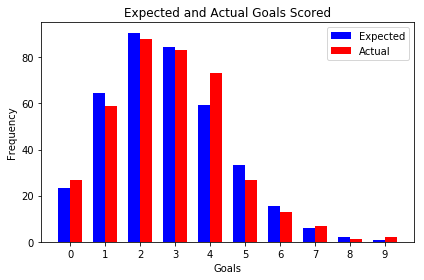

In [4]:
# importing packages to calculate the Poisson probabilities

from scipy.stats import poisson as poid
import numpy as np

l = np.mean(df['FTG'])

# finding the probability of scoring 0 to 9 goals

goals_probs = [poid.pmf(0,l),poid.pmf(1,l),poid.pmf(2,l),poid.pmf(3,l),poid.pmf(4,l),
         poid.pmf(5,l),poid.pmf(6,l),poid.pmf(7,l),poid.pmf(8,l),poid.pmf(9,l)]

# multiplying by the total number of games to find the probabilities to find the expected values

games_total = df.shape[0]

goals_exp = [i * games_total for i in goals_probs]

# plotting the goals as a bar chart

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

index = np.arange(maxg + 1)
bar_width = 0.35

rects1 = plt.bar(index, goals_exp, bar_width,
                 color='b',
                 label='Expected')

rects2 = plt.bar(index + bar_width, goals_act, bar_width,
                 color='r',
                 label='Actual')

plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Expected and Actual Goals Scored')
plt.xticks(index + bar_width / 2, ('0', '1', '2', '3', '4','5','6','7','8','9'))
plt.legend()

plt.tight_layout()
plt.show()

So the expected values match the actual pretty well, although there is a bit of a mismatch at 4 goals